In [17]:
import os
os.chdir('D:/py/')
from warnings import filterwarnings
filterwarnings('ignore')

In [22]:
import pandas as pd
df=pd.read_csv('Pin_save_data.csv')
df

,Date,Saves,Impressions,Mobile Saves,Tablet Saves,Web Saves
0,29-07-2022,0,38,0,0,0
1,30-07-2022,0,48,0,0,0
2,31-07-2022,0,19,0,0,0
3,01-08-2022,0,27,0,0,0
4,02-08-2022,0,24,0,0,0
...,...,...,...,...,...,...
535,15-01-2024,0,178,0,0,0
536,16-01-2024,0,179,0,0,0
537,17-01-2024,1,244,1,0,0
538,18-01-2024,0,191,0,0,0


In [23]:
#df['Date']=pd.to_datetime(df['Date'])
#df.index=df['Date']
df.drop(['Saves','Mobile Saves','Tablet Saves','Web Saves'],axis=1,inplace=True)
df

,Date,Impressions
0,29-07-2022,38
1,30-07-2022,48
2,31-07-2022,19
3,01-08-2022,27
4,02-08-2022,24
...,...,...
535,15-01-2024,178
536,16-01-2024,179
537,17-01-2024,244
538,18-01-2024,191


In [25]:
df['Date']=pd.to_datetime(df['Date'])
df.index=df['Date']

In [28]:
df.drop(['Date'],axis=1,inplace=True)
df

,Impressions
Date,
2022-07-29,38
2022-07-30,48
2022-07-31,19
2022-01-08,27
2022-02-08,24
...,...
2024-01-15,178
2024-01-16,179
2024-01-17,244


In [4]:
#df['Saves']=df['Saves'].fillna(df['Saves'].median())

# Decomposition

In [31]:
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

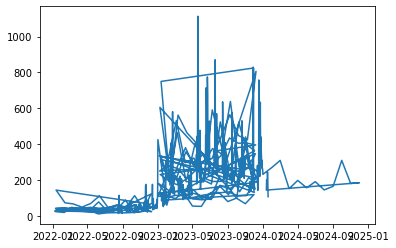

In [33]:
plt.plot(df['Impressions'])

In [ ]:
# se = seasonal_decompose(df,model='additive')

In [ ]:
plt.plot(se.)

# Forecasting

In [6]:
from pmdarima.arima import auto_arima

In [7]:
model = auto_arima(df['Impressions'], seasonal=True, suppress_warnings=True, m=12)
model

ARIMA(order=(3, 1, 1), scoring_args={}, seasonal_order=(0, 0, 1, 12),
      suppress_warnings=True, with_intercept=False)

In [8]:
Forecasting,conf=model.predict(n_periods=20,return_conf_int=True)
Forecasting

C:\Users\Ankita\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


540    204.365685
541    207.301099
542    198.193207
543    221.267288
544    224.982934
545    231.115182
546    229.258436
547    232.176130
548    233.985257
549    229.627002
550    234.393581
551    241.120809
552    234.075898
553    233.919214
554    233.853357
555    232.921635
556    232.680450
557    232.499691
558    232.309401
559    232.212455
dtype: float64

In [9]:
Forecasting=pd.Series(Forecasting)
Forecasting

540    204.365685
541    207.301099
542    198.193207
543    221.267288
544    224.982934
545    231.115182
546    229.258436
547    232.176130
548    233.985257
549    229.627002
550    234.393581
551    241.120809
552    234.075898
553    233.919214
554    233.853357
555    232.921635
556    232.680450
557    232.499691
558    232.309401
559    232.212455
dtype: float64

In [10]:
conf

array([[ -5.66055943, 414.39193007],
       [-10.81230798, 425.41450608],
       [-25.73960093, 422.12601537],
       [ -9.70226337, 452.23683985],
       [ -9.0344523 , 459.00032018],
       [ -5.22054804, 467.45091295],
       [ -9.01533886, 467.53221128],
       [ -7.59121814, 471.94347787],
       [ -7.07863273, 475.04914577],
       [-12.60605633, 471.86006095],
       [ -8.91175658, 477.6989183 ],
       [ -3.19756361, 485.43918128],
       [-10.30762831, 478.45942507],
       [-11.05468621, 478.89311452],
       [-11.7398421 , 479.44655557],
       [-13.24868453, 479.09195396],
       [-14.16272025, 479.52362075],
       [-15.03631355, 480.03569609],
       [-15.92985461, 480.54865618],
       [-16.74684316, 481.17175249]])

In [11]:
lower_conf=conf[:,0]
lower_conf=pd.Series(lower_conf)
lower_conf.index=Forecasting.index

In [12]:
upper_conf=conf[:,1]
upper_conf=pd.Series(upper_conf)
upper_conf.index=Forecasting.index

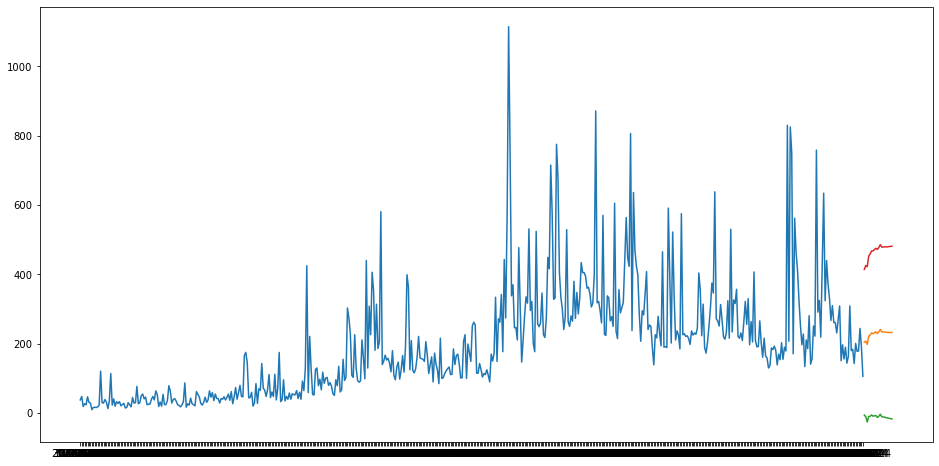

In [13]:
plt.figure(figsize=(16,8))
plt.plot(df)
plt.plot(Forecasting)
plt.plot(lower_conf)
plt.plot(upper_conf)

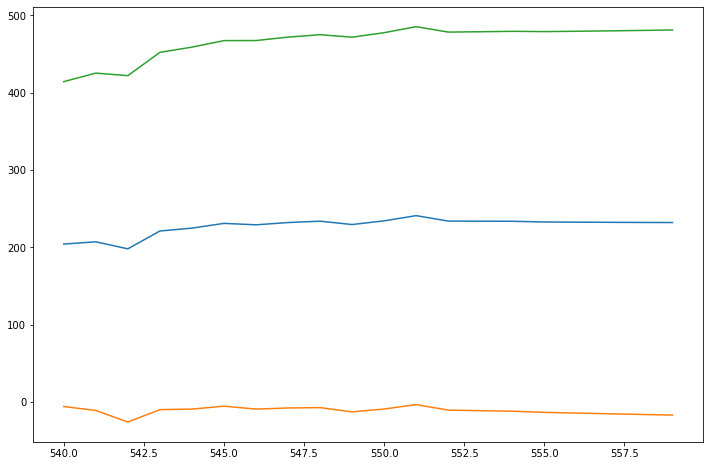

In [14]:
plt.figure(figsize=(12,8))
plt.plot(Forecasting)
plt.plot(lower_conf)
plt.plot(upper_conf)